<a href="https://colab.research.google.com/github/Zahra-Ferdous/Thesis_Human_Action_Recognition_from_Depth_Video/blob/main/depth_video_preprocess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn
import math
%matplotlib inline
import os
import time

from numba.core.cgutils import if_likely
#from os.path import exists
import os.path 

import cv2
import sklearn
import scipy.io as sio
from numba import jit
from math import factorial, log
from sklearn.neighbors import KDTree
from scipy.signal import periodogram, welch
from astropy.timeseries import LombScargle
from scipy.io import loadmat


import imageio
from skimage import feature

In [3]:
#prewitt
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])

In [4]:
def masked(img):
  x = np.logical_and((img>=70), (img<=90)).astype(int)
  return x


def prewitt_filtered(data):
  d = masked(data)
  d = d.astype('float32')
  im = cv2.resize(d, dsize=(227,227))

  im = cv2.filter2D(im, -1, kernelx)
  return im

def sfi_filtered(data):
  d = masked(data)
  d = d.astype('float32')
  im = cv2.resize(d, dsize=(227,227))
  
  img_gaussian = cv2.GaussianBlur(im,(3,3),0)
  im = cv2.filter2D(img_gaussian, -1, kernelx)
  return im

## for finding the mask

In [ ]:
'''
path = '/content/drive/MyDrive/depth_mat'

cnt = 0
#max_frame = -1
start = time.time()

for file in os.listdir(path):
    if file.endswith('.mat'):
      cnt+=1
      # print(cnt)
      # print(file)

      if(cnt == 13):
        continue
      
      if((file[0:2]!='cx' and file[5:7]=='22') or (file[0:2]=='cx' and file[4:6]=='22')):
        d = sio.loadmat(path+'/'+file)['depth']
        #print(cnt)
        print(file)
      
        print(d.shape)
'''

"\npath = '/content/drive/MyDrive/depth_mat'\n\ncnt = 0\n#max_frame = -1\nstart = time.time()\n\nfor file in os.listdir(path):\n    if file.endswith('.mat'):\n      cnt+=1\n      # print(cnt)\n      # print(file)\n\n      if(cnt == 13):\n        continue\n      \n      if((file[0:2]!='cx' and file[5:7]=='22') or (file[0:2]=='cx' and file[4:6]=='22')):\n        d = sio.loadmat(path+'/'+file)['depth']\n        #print(cnt)\n        print(file)\n      \n        print(d.shape)\n"

In [ ]:
path = '/content/drive/MyDrive/depth_mat/zyh_a22_t3.mat'
#dat = sio.loadmat(path)['depth']
d = sio.loadmat(path)['depth']

246


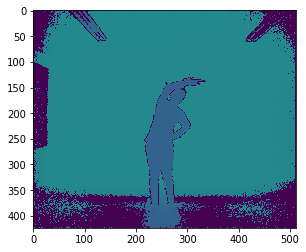

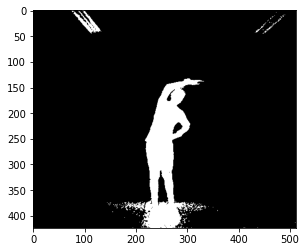

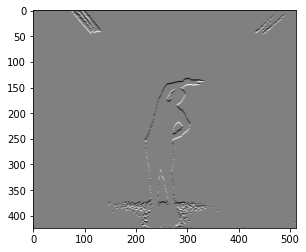

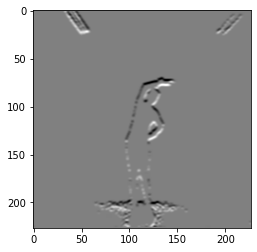

In [ ]:

frame = d.shape[0]
print(d[34].max())



plt.imshow(d[34], interpolation='nearest')
plt.show()

mask = masked(d[34])
plt.imshow(mask,cmap="gray")
plt.show()
mask = mask.astype('float32')
pr = cv2.filter2D(mask, -1, kernelx)
plt.imshow(pr,cmap="gray")
plt.show()

im = sfi_filtered(d[34])
plt.imshow(im,cmap="gray")
plt.show()

# for k in range(frame):
#   if(k%10==0):

#     plt.imshow(d[k], interpolation='nearest')
#     plt.title(k)
#     plt.show()

#     im = sfi_filtered(d[k])
    
#     plt.imshow(im)
#     plt.show()




In [ ]:
img = d[34]

print(img[250,200:300])
img[400,300:400]

[116 116 116 116 116 117 117 116 116 116 116 116 116 116 116 117 117 117
   0  78  77  77  77  77  77  77  77  77  77  77  77  77  77  77  77  77
  77  77  76  76  76  76  76  76  76  76  76  76  76  76  76  76  76  76
  76  76  76  76  76  76  77  77  77  77  77  78  78  78  79  80  80  81
  81  81  81  82   0   0   0   0 116 116 116 116 116 116 116 116 116 116
 116 116 116 116 116 116 116 116 116 116]


array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 113,   0,   0,
         0,   0, 113, 113, 113, 113,   0, 113, 113, 113,   0,   0, 112,
       113,   0,   0,   0,   0, 112,   0, 112,   0], dtype=uint8)

In [ ]:

p = '/content/drive/MyDrive/depth_mat/myj_a1_t2.mat'
d = sio.loadmat(p)['depth']
frame = d.shape[0]
print(frame)
for k in range(30,130):
        if k%2==0:
          
          im = np.array(d[k][100:370, 150:400])
          #print(im)
          im = cv2.resize(im, dsize=(227,227))
          img_gaussian = cv2.GaussianBlur(im,(3,3),0)
          im = cv2.filter2D(img_gaussian, -1, kernelx)
          plt.imshow(im, interpolation='nearest')
          plt.show()

          im = np.array([im])
          #im = np.array()
          if(k==30):
            im1 = im
          else:
            im1 = np.concatenate((im1, im), axis=0)

          # plt.imshow(d[k], interpolation='nearest')
          # plt.title(k)
          # plt.show()
print(im1.shape)
ser_data = {'data':im1,'label':1} 
ser = pd.Series(data = ser_data, index = ['data','label'])
l_ser.append(ser)


"\np = '/content/drive/MyDrive/depth_mat/myj_a1_t2.mat'\nd = sio.loadmat(p)['depth']\nframe = d.shape[0]\nprint(frame)\nfor k in range(30,130):\n        if k%2==0:\n          \n          im = np.array(d[k][100:370, 150:400])\n          #print(im)\n          im = cv2.resize(im, dsize=(224,224))\n          im = np.array([im])\n          #im = np.array()\n          if(k==30):\n            im1 = im\n          else:\n            im1 = np.concatenate((im1, im), axis=0)\n\n          # plt.imshow(d[k], interpolation='nearest')\n          # plt.title(k)\n          # plt.show()\nprint(im1.shape)\nser_data = {'data':im1,'label':1} \nser = pd.Series(data = ser_data, index = ['data','label'])\nl_ser.append(ser)\n"

## run from here

In [5]:
l_ser = []

## a1 = 54 (right hand wave)

In [16]:
path = '/content/drive/MyDrive/depth_mat'

cnt = 0
#max_frame = -1
start = time.time()

for file in os.listdir(path):
    if file.endswith('.mat'):
      cnt+=1
      # print(cnt)
      # print(file)

      if(cnt == 13 or cnt == 1):
        continue
      
      if((file[0:2]!='cx' and file[5:7]=='1_') or (file[0:2]=='cx' and file[4:6]=='1_')):
        d = sio.loadmat(path+'/'+file)['depth']
      
        #print(d.shape)
        frame = d.shape[0]
        if(frame<130):
          for k in range(0,100):
            if k%2==0:
          
              im = np.array(d[k][100:370, 150:400])

              im_g = sfi_filtered(im)
              im = prewitt_filtered(im)
              im_org = cv2.resize(im, dsize=(227,227))

              im = np.array([im])
              im_g = np.array([im_g])
              im_org = np.array([im_org])
              #im = np.array()
              if(k==0):
                im1 = im
                im_g1 = im_g
                im_org1 = im_org
              else:
                im1 = np.concatenate((im1, im), axis=0)
                im_g1 = np.concatenate((im_g1, im_g), axis=0)
                im_org1 = np.concatenate((im_org1, im_org), axis=0)

        else:
          for k in range(30,130):
            if k%2==0:
              im = np.array(d[k][100:370, 150:400])
              #print(im)
              #im = cv2.resize(im, dsize=(64,64))

              im_g = sfi_filtered(im)
              im = prewitt_filtered(im)
              im_org = cv2.resize(im, dsize=(227,227))

              im_org = np.array([im_org])
              im_g = np.array([im_g])
              im = np.array([im])
              #im = np.array()
              if(k==30):
                im1 = im
                im_g1 = im_g
                im_org1 = im_org
              else:
                im1 = np.concatenate((im1, im), axis=0)
                im_g1 = np.concatenate((im_g1, im_g), axis=0)
                im_org1 = np.concatenate((im_org1, im_org), axis=0)

        #print(im1.shape)

        #------------------------normalization------------------------

        im1 = im1/im1.max()
        im_g1 = im_g1/im_g1.max()
        im_org1 = im_org1/im_org1.max()
        
        # im1 = im1.reshape(im1.shape[0], 224,224, 1)
        print(im1.shape)

        

        ser_data = { 'data': im_org1 , 'data_prewitt': im1 , 'data_gauss_prewitt':im_g1, 'filename': file , 'label': 0 } 
        ser = pd.Series(data = ser_data, index = ['data','data_prewitt','data_gauss_prewitt','filename','label'])
        l_ser.append(ser)

##a2 = 53 (left hand wave)

In [17]:
path = '/content/drive/MyDrive/depth_mat'

cnt = 0
#max_frame = -1
start = time.time()

for file in os.listdir(path):
    if file.endswith('.mat'):
      cnt+=1
      # print(cnt)
      # print(file)

      if(cnt == 13):
        continue
      
      if((file[0:2]!='cx' and file[5:7]=='2_') or (file[0:2]=='cx' and file[4:6]=='2_')):
        d = sio.loadmat(path+'/'+file)['depth']
      
        # print(d.shape)
        frame = d.shape[0]
        if(frame<130):
          for k in range(16,116):
            if k%2==0:
          
              im = np.array(d[k][100:370, 100:350])
              
              im_g = sfi_filtered(im)
              im = prewitt_filtered(im)
              im_org = cv2.resize(im, dsize=(227,227))

              im = np.array([im])
              im_g = np.array([im_g])
              im_org = np.array([im_org])

              if(k==16):
                im1 = im
                im_g1 = im_g
                im_org1 = im_org
              else:
                im1 = np.concatenate((im1, im), axis=0)
                im_g1 = np.concatenate((im_g1, im_g), axis=0)
                im_org1 = np.concatenate((im_org1, im_org), axis=0)
        else:
          for k in range(30,130):
            if k%2==0:
              im = np.array(d[k][100:370, 100:350])

              im_g = sfi_filtered(im)
              im = prewitt_filtered(im)
              im_org = cv2.resize(im, dsize=(227,227))

              im = np.array([im])
              im_g = np.array([im_g])
              im_org = np.array([im_org])

              if(k==30):
                im1 = im
                im_g1 = im_g
                im_org1 = im_org
              else:
                im1 = np.concatenate((im1, im), axis=0)
                im_g1 = np.concatenate((im_g1, im_g), axis=0)
                im_org1 = np.concatenate((im_org1, im_org), axis=0)
        #------------------------normalization------------------------

        im1 = im1/im1.max()
        im_g1 = im_g1/im_g1.max()
        im_org1 = im_org1/im_org1.max()


        print(im1.shape)

        
        ser_data = { 'data': im_org1 , 'data_prewitt': im1 , 'data_gauss_prewitt': im_g1, 'filename': file , 'label': 1 } 
        ser = pd.Series(data = ser_data, index = ['data','data_prewitt','data_gauss_prewitt','filename','label'])
        l_ser.append(ser)

(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)


## a3 = 53 (Right horizontal wave)

In [18]:
path = '/content/drive/MyDrive/depth_mat'

cnt = 0
#max_frame = -1
start = time.time()

for file in os.listdir(path):
    if file.endswith('.mat'):
      cnt+=1
      # print(cnt)
      # print(file)

      if(cnt == 13 ):
        continue
      
      if((file[0:2]!='cx' and file[5:7]=='3_') or (file[0:2]=='cx' and file[4:6]=='3_')):
        d = sio.loadmat(path+'/'+file)['depth']
      
        # print(d.shape)
        frame = d.shape[0]
        if(frame<130):
          for k in range(14,114):
            if k%2==0:
          
              im = np.array(d[k][100:370, 150:400])

              im_g = sfi_filtered(im)
              im = prewitt_filtered(im)
              im_org = cv2.resize(im, dsize=(227,227))

              im = np.array([im])
              im_g = np.array([im_g])
              im_org = np.array([im_org])

              if(k==14):
                im1 = im
                im_g1 = im_g
                im_org1 = im_org
              else:
                im1 = np.concatenate((im1, im), axis=0)
                im_g1 = np.concatenate((im_g1, im_g), axis=0)
                im_org1 = np.concatenate((im_org1, im_org), axis=0)
        else:
          for k in range(30,130):
            if k%2==0:
              im = np.array(d[k][100:370, 150:400])

              im_g = sfi_filtered(im)
              im = prewitt_filtered(im)
              im_org = cv2.resize(im, dsize=(227,227))

              im = np.array([im])
              im_g = np.array([im_g])
              im_org = np.array([im_org])

              if(k==30):
                im1 = im
                im_g1 = im_g
                im_org1 = im_org
              else:
                im1 = np.concatenate((im1, im), axis=0)
                im_g1 = np.concatenate((im_g1, im_g), axis=0)
                im_org1 = np.concatenate((im_org1, im_org), axis=0)
        
        #------------------------normalization------------------------

        im1 = im1/im1.max()
        im_g1 = im_g1/im_g1.max()
        im_org1 = im_org1/im_org1.max()

        print(im1.shape)

        ser_data = { 'data': im_org1 , 'data_prewitt': im1 , 'data_gauss_prewitt': im_g1, 'filename': file , 'label': 2 } 
        ser = pd.Series(data = ser_data, index = ['data','data_prewitt','data_gauss_prewitt','filename','label'])
        l_ser.append(ser)

(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)


## a4 = 53 (left horizontal wave)

In [19]:
path = '/content/drive/MyDrive/depth_mat'

cnt = 0
#max_frame = -1
start = time.time()

for file in os.listdir(path):
    if file.endswith('.mat'):
      cnt+=1
      # print(cnt)
      # print(file)

      if(cnt == 13):
        continue
      
      if((file[0:2]!='cx' and file[5:7]=='4_') or (file[0:2]=='cx' and file[4:6]=='4_')):
        d = sio.loadmat(path+'/'+file)['depth']
      
        # print(d.shape)
        frame = d.shape[0]
        if(frame<130):
          for k in range(14,114):
            if k%2==0:
          
              im = np.array(d[k][100:370, 100:350])

              im_g = sfi_filtered(im)
              im = prewitt_filtered(im)
              im_org = cv2.resize(im, dsize=(227,227))

              im = np.array([im])
              im_g = np.array([im_g])
              im_org = np.array([im_org])
              
              if(k==14):
                im1 = im
                im_g1 = im_g
                im_org1 = im_org
              else:
                im1 = np.concatenate((im1, im), axis=0)
                im_g1 = np.concatenate((im_g1, im_g), axis=0)
                im_org1 = np.concatenate((im_org1, im_org), axis=0)
        else:
          for k in range(30,130):
            if k%2==0:
              im = np.array(d[k][100:370, 100:350])

              im_g = sfi_filtered(im)
              im = prewitt_filtered(im)
              im_org = cv2.resize(im, dsize=(227,227))

              im = np.array([im])
              im_g = np.array([im_g])
              im_org = np.array([im_org])

              if(k==30):
                im1 = im
                im_g1 = im_g
                im_org1 = im_org
              else:
                im1 = np.concatenate((im1, im), axis=0)
                im_g1 = np.concatenate((im_g1, im_g), axis=0)
                im_org1 = np.concatenate((im_org1, im_org), axis=0)
        
        #------------------------normalization------------------------

        im1 = im1/im1.max()
        im_g1 = im_g1/im_g1.max()
        im_org1 = im_org1/im_org1.max()

        print(im1.shape)

        ser_data = { 'data': im_org1 , 'data_prewitt': im1 , 'data_gauss_prewitt': im_g1, 'filename': file , 'label': 3 } 
        ser = pd.Series(data = ser_data, index = ['data','data_prewitt','data_gauss_prewitt','filename','label'])
        l_ser.append(ser)

(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)


## a5 = 53 ( Hammer with right hand )

In [20]:
path = '/content/drive/MyDrive/depth_mat'

cnt = 0
cxxnt = 0
#max_frame = -1
start = time.time()

for file in os.listdir(path):
    if file.endswith('.mat'):
      cnt+=1
      # print(cnt)
      # print(file)

      if(cnt == 13 ):
        continue
      
      if((file[0:2]!='cx' and file[5:7]=='5_') or (file[0:2]=='cx' and file[4:6]=='5_')):
        d = sio.loadmat(path+'/'+file)['depth']
        cxxnt += 1
        # if(cxxnt <= 23 ):
        #   continue
      
        # print(d.shape)
        frame = d.shape[0]
        
        for k in range(0,50):
          if k%1==0:
            im = np.array(d[k][100:370, 150:400])
            
            im_g = sfi_filtered(im)
            im = prewitt_filtered(im)
            im_org = cv2.resize(im, dsize=(227,227))

            im = np.array([im])
            im_g = np.array([im_g])
            im_org = np.array([im_org])

            if(k==0):
              im1 = im
              im_g1 = im_g
              im_org1 = im_org
            else:
              im1 = np.concatenate((im1, im), axis=0)
              im_g1 = np.concatenate((im_g1, im_g), axis=0)
              im_org1 = np.concatenate((im_org1, im_org), axis=0)
      
        #------------------------normalization------------------------

        im1 = im1/im1.max()
        im_g1 = im_g1/im_g1.max()
        im_org1 = im_org1/im_org1.max()

        print(im1.shape)

        ser_data = { 'data': im_org1 , 'data_prewitt': im1 , 'data_gauss_prewitt': im_g1, 'filename': file , 'label': 4 } 
        ser = pd.Series(data = ser_data, index = ['data','data_prewitt','data_gauss_prewitt','filename','label'])
        l_ser.append(ser)

(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)


## 1st check point

In [21]:
cols = ['data','data_prewitt','data_gauss_prewitt','filename','label']
df = pd.DataFrame(l_ser, columns=cols)
print(df.shape)

(265, 5)


In [22]:
sio.savemat('/content/drive/MyDrive/Colab Notebooks/datasets/depth_video_a0to4_50x227x227_filtered.mat',{name: col.values for name, col in df.items()})

## a6 = Grasp with right hand

In [7]:
path = '/content/drive/MyDrive/depth_mat'

cnt = 0
#max_frame = -1
start = time.time()

for file in os.listdir(path):
    if file.endswith('.mat'):
      cnt+=1
      # print(cnt)
      # print(file)

      if(cnt == 13 ):
        continue
      
      if((file[0:2]!='cx' and file[5:7]=='6_') or (file[0:2]=='cx' and file[4:6]=='6_')):
        d = sio.loadmat(path+'/'+file)['depth']
      
        # print(d.shape)
        frame = d.shape[0]
        
        for k in range(8,58):
          if k%1==0:
            im = np.array(d[k][100:370, 150:400])
            
            im_g = sfi_filtered(im)
            im = prewitt_filtered(im)
            im_org = cv2.resize(im, dsize=(227,227))

            im = np.array([im])
            im_g = np.array([im_g])
            im_org = np.array([im_org])

            if(k==8):
              im1 = im
              im_g1 = im_g
              im_org1 = im_org
            else:
              im1 = np.concatenate((im1, im), axis=0)
              im_g1 = np.concatenate((im_g1, im_g), axis=0)
              im_org1 = np.concatenate((im_org1, im_org), axis=0)
        
        #------------------------normalization------------------------

        im1 = im1/im1.max()
        im_g1 = im_g1/im_g1.max()
        im_org1 = im_org1/im_org1.max()

        print(im1.shape)

        ser_data = { 'data': im_org1 , 'data_prewitt': im1 , 'data_gauss_prewitt': im_g1, 'filename': file , 'label': 5 } 
        ser = pd.Series(data = ser_data, index = ['data','data_prewitt','data_gauss_prewitt','filename','label'])
        l_ser.append(ser)

(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)


## a7 = Draw x with right hand

In [8]:
path = '/content/drive/MyDrive/depth_mat'

cnt = 0
#max_frame = -1
start = time.time()

for file in os.listdir(path):
    if file.endswith('.mat'):
      cnt+=1
      # print(cnt)
      # print(file)

      if(cnt == 13):
        continue
      
      if((file[0:2]!='cx' and file[5:7]=='7_') or (file[0:2]=='cx' and file[4:6]=='7_')):
        d = sio.loadmat(path+'/'+file)['depth']
      
        #print(d.shape)
        frame = d.shape[0]
        if(frame<100):
          for k in range(10,60):
            if k%1==0:
              im = np.array(d[k][100:370, 150:400])

              im_g = sfi_filtered(im)
              im = prewitt_filtered(im)
              im_org = cv2.resize(im, dsize=(227,227))

              im = np.array([im])
              im_g = np.array([im_g])
              im_org = np.array([im_org])

              if(k==10):
                im1 = im
                im_g1 = im_g
                im_org1 = im_org
              else:
                im1 = np.concatenate((im1, im), axis=0)
                im_g1 = np.concatenate((im_g1, im_g), axis=0)
                im_org1 = np.concatenate((im_org1, im_org), axis=0)

        else:
          for k in range(0,100):
            if k%2==0:
              im = np.array(d[k][100:370, 150:400])
              im_g = sfi_filtered(im)
              im = prewitt_filtered(im)
              im_org = cv2.resize(im, dsize=(227,227))

              im = np.array([im])
              im_g = np.array([im_g])
              im_org = np.array([im_org])

              if(k==0):
                im1 = im
                im_g1 = im_g
                im_org1 = im_org
              else:
                im1 = np.concatenate((im1, im), axis=0)
                im_g1 = np.concatenate((im_g1, im_g), axis=0)
                im_org1 = np.concatenate((im_org1, im_org), axis=0)
          
        #------------------------normalization------------------------

        im1 = im1/im1.max()
        im_g1 = im_g1/im_g1.max()
        im_org1 = im_org1/im_org1.max()

        print(im1.shape)

        ser_data = { 'data': im_org1 , 'data_prewitt': im1 , 'data_gauss_prewitt': im_g1, 'filename': file , 'label': 6 } 
        ser = pd.Series(data = ser_data, index = ['data','data_prewitt','data_gauss_prewitt','filename','label'])
        l_ser.append(ser)

(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)


## a8 = Draw x with left hand

In [9]:
path = '/content/drive/MyDrive/depth_mat'

cnt = 0
#max_frame = -1
start = time.time()

for file in os.listdir(path):
    if file.endswith('.mat'):
      cnt+=1
      # print(cnt)
      # print(file)

      if(cnt == 13):
        continue
      
      if((file[0:2]!='cx' and file[5:7]=='8_') or (file[0:2]=='cx' and file[4:6]=='8_')):
        d = sio.loadmat(path+'/'+file)['depth']
      
        # print(d.shape)
        frame = d.shape[0]
        if(frame<100):
          for k in range(2,23):
            if k%2==0:
              im = np.array(d[k][100:370, 100:350])

              im_g = sfi_filtered(im)
              im = prewitt_filtered(im)
              im_org = cv2.resize(im, dsize=(227,227))

              im = np.array([im])
              im_g = np.array([im_g])
              im_org = np.array([im_org])

              if(k==2):
                im1 = im
                im_g1 = im_g
                im_org1 = im_org
              else:
                im1 = np.concatenate((im1, im), axis=0)
                im_g1 = np.concatenate((im_g1, im_g), axis=0)
                im_org1 = np.concatenate((im_org1, im_org), axis=0)

          for k in range(23,52):
            if k%1==0:
              im = np.array(d[k][100:370, 100:350])
              im_g = sfi_filtered(im)
              im = prewitt_filtered(im)
              im_org = cv2.resize(im, dsize=(227,227))

              im = np.array([im])
              im_g = np.array([im_g])
              im_org = np.array([im_org])
              
              im1 = np.concatenate((im1, im), axis=0)
              im_g1 = np.concatenate((im_g1, im_g), axis=0)
              im_org1 = np.concatenate((im_org1, im_org), axis=0)

          for k in range(52,71):
            if k%2==0:
              im = np.array(d[k][100:370, 100:350])

              im_g = sfi_filtered(im)
              im = prewitt_filtered(im)
              im_org = cv2.resize(im, dsize=(227,227))

              im = np.array([im])
              im_g = np.array([im_g])
              im_org = np.array([im_org])

              im1 = np.concatenate((im1, im), axis=0)
              im_g1 = np.concatenate((im_g1, im_g), axis=0)
              im_org1 = np.concatenate((im_org1, im_org), axis=0)

        else:
          for k in range(0,100):
            if k%2==0:
              im = np.array(d[k][100:370, 10:350])

              im_g = sfi_filtered(im)
              im = prewitt_filtered(im)
              im_org = cv2.resize(im, dsize=(227,227))

              im = np.array([im])
              im_g = np.array([im_g])
              im_org = np.array([im_org])

              if(k==0):
                im1 = im
                im_g1 = im_g
                im_org1 = im_org
              else:
                im1 = np.concatenate((im1, im), axis=0)
                im_g1 = np.concatenate((im_g1, im_g), axis=0)
                im_org1 = np.concatenate((im_org1, im_org), axis=0)
          
        #------------------------normalization------------------------

        im1 = im1/im1.max()
        im_g1 = im_g1/im_g1.max()
        im_org1 = im_org1/im_org1.max()

        print(im1.shape)

        ser_data = { 'data': im_org1 , 'data_prewitt': im1 , 'data_gauss_prewitt': im_g1, 'filename': file , 'label': 7 } 
        ser = pd.Series(data = ser_data, index = ['data','data_prewitt','data_gauss_prewitt','filename','label'])
        l_ser.append(ser)

(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)


## a9 = Draw circle with right hand 

In [10]:
path = '/content/drive/MyDrive/depth_mat'

cnt = 0
#max_frame = -1
start = time.time()

for file in os.listdir(path):
    if file.endswith('.mat'):
      cnt+=1
      # print(cnt)
      # print(file)

      if(cnt == 13):
        continue
      
      if((file[0:2]!='cx' and file[5:7]=='9_') or (file[0:2]=='cx' and file[4:6]=='9_')):
        d = sio.loadmat(path+'/'+file)['depth']
      
        # print(d.shape)
        frame = d.shape[0]
        if(frame<60):
          for k in range(7,57):
            if k%1==0:
              im = np.array(d[k][100:370, 150:400])

              im_g = sfi_filtered(im)
              im = prewitt_filtered(im)
              im_org = cv2.resize(im, dsize=(227,227))

              im = np.array([im])
              im_g = np.array([im_g])
              im_org = np.array([im_org])

              if(k==7):
                im1 = im
                im_g1 = im_g
                im_org1 = im_org
              else:
                im1 = np.concatenate((im1, im), axis=0)
                im_g1 = np.concatenate((im_g1, im_g), axis=0)
                im_org1 = np.concatenate((im_org1, im_org), axis=0)

        elif frame<100:
          for k in range(12,62):
            if k%1==0:
              im = np.array(d[k][100:370, 150:400])

              im_g = sfi_filtered(im)
              im = prewitt_filtered(im)
              im_org = cv2.resize(im, dsize=(227,227))

              im = np.array([im])
              im_g = np.array([im_g])
              im_org = np.array([im_org])

              if(k==12):
                im1 = im
                im_g1 = im_g
                im_org1 = im_org
              else:
                im1 = np.concatenate((im1, im), axis=0)
                im_g1 = np.concatenate((im_g1, im_g), axis=0)
                im_org1 = np.concatenate((im_org1, im_org), axis=0)

        else:
          for k in range(0,100):
            if k%2==0:
              im = np.array(d[k][100:370, 150:400])

              im_g = sfi_filtered(im)
              im = prewitt_filtered(im)
              im_org = cv2.resize(im, dsize=(227,227))

              im = np.array([im])
              im_g = np.array([im_g])
              im_org = np.array([im_org])

              if(k==0):
                im1 = im
                im_g1 = im_g
                im_org1 = im_org
              else:
                im1 = np.concatenate((im1, im), axis=0)
                im_g1 = np.concatenate((im_g1, im_g), axis=0)
                im_org1 = np.concatenate((im_org1, im_org), axis=0)

        #------------------------normalization------------------------

        im1 = im1/im1.max()
        im_g1 = im_g1/im_g1.max()
        im_org1 = im_org1/im_org1.max()

        print(im1.shape)

        ser_data = { 'data': im_org1 , 'data_prewitt': im1 , 'data_gauss_prewitt': im_g1, 'filename': file , 'label': 8 } 
        ser = pd.Series(data = ser_data, index = ['data','data_prewitt','data_gauss_prewitt','filename','label'])
        l_ser.append(ser)

(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)


## a10 = Draw circle with left hand 

In [11]:
path = '/content/drive/MyDrive/depth_mat'

cnt = 0
#max_frame = -1
start = time.time()

for file in os.listdir(path):
    if file.endswith('.mat'):
      cnt+=1
      # print(cnt)
      # print(file)

      if(cnt == 13):
        continue
      
      if((file[0:2]!='cx' and file[5:7]=='10') or (file[0:2]=='cx' and file[4:6]=='10')):
        d = sio.loadmat(path+'/'+file)['depth']
      
        # print(d.shape)
        frame = d.shape[0]

        if(frame<50):
          for k in range(0,frame):
            if k%1==0:
              im = np.array(d[k][100:370, 100:350])

              im_g = sfi_filtered(im)
              im = prewitt_filtered(im)
              im_org = cv2.resize(im, dsize=(227,227))

              im = np.array([im])
              im_g = np.array([im_g])
              im_org = np.array([im_org])

              if(k==0):
                im1 = im
                im_g1 = im_g
                im_org1 = im_org
              else:
                im1 = np.concatenate((im1, im), axis=0)
                im_g1 = np.concatenate((im_g1, im_g), axis=0)
                im_org1 = np.concatenate((im_org1, im_org), axis=0)

          im = np.array(d[frame-1][100:400, 100:350])

          im_g = sfi_filtered(im)
          im = prewitt_filtered(im)
          im_org = cv2.resize(im, dsize=(227,227))
        
          im = np.array([im])
          im_g = np.array([im_g])
          im_org = np.array([im_org])

          im1 = np.concatenate((im1, im), axis=0)
          im_g1 = np.concatenate((im_g1, im_g), axis=0)
          im_org1 = np.concatenate((im_org1, im_org), axis=0)

        elif(frame<100):
          for k in range(7,57):
            if k%1==0:
              im = np.array(d[k][100:370, 100:350])
              
              im_g = sfi_filtered(im)
              im = prewitt_filtered(im)
              im_org = cv2.resize(im, dsize=(227,227))

              im = np.array([im])
              im_g = np.array([im_g])
              im_org = np.array([im_org])
              
              if(k==7):
                im1 = im
                im_g1 = im_g
                im_org1 = im_org
              else:
                im1 = np.concatenate((im1, im), axis=0)
                im_g1 = np.concatenate((im_g1, im_g), axis=0)
                im_org1 = np.concatenate((im_org1, im_org), axis=0)

        else:
          for k in range(0,100):
            if k%2==0:
              im = np.array(d[k][100:370, 100:350])
              
              im_g = sfi_filtered(im)
              im = prewitt_filtered(im)
              im_org = cv2.resize(im, dsize=(227,227))

              im = np.array([im])
              im_g = np.array([im_g])
              im_org = np.array([im_org])

              if(k==0):
                im1 = im
                im_g1 = im_g
                im_org1 = im_org
              else:
                im1 = np.concatenate((im1, im), axis=0)
                im_g1 = np.concatenate((im_g1, im_g), axis=0)
                im_org1 = np.concatenate((im_org1, im_org), axis=0)

        #------------------------normalization------------------------

        im1 = im1/im1.max()
        im_g1 = im_g1/im_g1.max()
        im_org1 = im_org1/im_org1.max()

        print(im1.shape)

        ser_data = { 'data': im_org1 , 'data_prewitt': im1 , 'data_gauss_prewitt': im_g1, 'filename': file , 'label': 9 } 
        ser = pd.Series(data = ser_data, index = ['data','data_prewitt','data_gauss_prewitt','filename','label'])
        l_ser.append(ser)

(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)


## 2nd check point

In [12]:
cols = ['data','data_prewitt','data_gauss_prewitt','filename','label']
df = pd.DataFrame(l_ser, columns=cols)
print(df.shape)

sio.savemat('/content/drive/MyDrive/Colab Notebooks/datasets/depth_video_a5to9_50x227x227_filtered.mat',{name: col.values for name, col in df.items()})


(265, 5)


## a11 = Right foot kick forward

In [6]:
path = '/content/drive/MyDrive/depth_mat'

cnt = 0
#max_frame = -1
start = time.time()

for file in os.listdir(path):
    if file.endswith('.mat'):
      cnt+=1
      # print(cnt)
      # print(file)

      if(cnt == 13):
        continue
      
      if((file[0:2]!='cx' and file[5:7]=='11') or (file[0:2]=='cx' and file[4:6]=='11')):
        d = sio.loadmat(path+'/'+file)['depth']
      
        # print(d.shape)
        frame = d.shape[0]
        
        if(frame<=50):
          for k in range(0,frame):
            if k%1==0:
              im = np.array(d[k][100:400, 140:390])
              
              im_g = sfi_filtered(im)
              im = prewitt_filtered(im)
              im_org = cv2.resize(im, dsize=(227,227))

              im = np.array([im])
              im_g = np.array([im_g])
              im_org = np.array([im_org])

              if(k==0):
                im1 = im
                im_g1 = im_g
                im_org1 = im_org
              else:
                im1 = np.concatenate((im1, im), axis=0)
                im_g1 = np.concatenate((im_g1, im_g), axis=0)
                im_org1 = np.concatenate((im_org1, im_org), axis=0)

          for k in range(frame,50):
            if k%1==0:
              im = np.array(d[frame-1][100:400, 140:390])

              im_g = sfi_filtered(im)
              im = prewitt_filtered(im)
              im_org = cv2.resize(im, dsize=(227,227))

              im = np.array([im])
              im_g = np.array([im_g])
              im_org = np.array([im_org])

              im1 = np.concatenate((im1, im), axis=0)
              im_g1 = np.concatenate((im_g1, im_g), axis=0)
              im_org1 = np.concatenate((im_org1, im_org), axis=0)
              
        else:
          for k in range(0,50):
            if k%1==0:
              im = np.array(d[k][100:400, 140:390])

              im_g = sfi_filtered(im)
              im = prewitt_filtered(im)
              im_org = cv2.resize(im, dsize=(227,227))

              im = np.array([im])
              im_g = np.array([im_g])
              im_org = np.array([im_org])

              if(k==0):
                im1 = im
                im_g1 = im_g
                im_org1 = im_org
              else:
                im1 = np.concatenate((im1, im), axis=0)
                im_g1 = np.concatenate((im_g1, im_g), axis=0)
                im_org1 = np.concatenate((im_org1, im_org), axis=0)

        #------------------------normalization------------------------

        im1 = im1/im1.max()
        im_g1 = im_g1/im_g1.max()
        im_org1 = im_org1/im_org1.max()

        print(im1.shape)

        ser_data = { 'data': im_org1 , 'data_prewitt': im1 , 'data_gauss_prewitt': im_g1, 'filename': file , 'label': 10 } 
        ser = pd.Series(data = ser_data, index = ['data','data_prewitt','data_gauss_prewitt','filename','label'])
        l_ser.append(ser)

(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)


## a12 = left foot kick forward

In [7]:
path = '/content/drive/MyDrive/depth_mat'

cnt = 0
#max_frame = -1
start = time.time()

for file in os.listdir(path):
    if file.endswith('.mat'):
      cnt+=1
      # print(cnt)
      # print(file)

      if(cnt == 13):
        continue
      
      if((file[0:2]!='cx' and file[5:7]=='12') or (file[0:2]=='cx' and file[4:6]=='12')):
        d = sio.loadmat(path+'/'+file)['depth']
      
        # print(d.shape)
        frame = d.shape[0]
        
        if(frame<=50):
          for k in range(0,frame):
            if k%1==0:
              im = np.array(d[k][100:400, 100:350])

              im_g = sfi_filtered(im)
              im = prewitt_filtered(im)
              im_org = cv2.resize(im, dsize=(227,227))

              im = np.array([im])
              im_g = np.array([im_g])
              im_org = np.array([im_org])

              if(k==0):
                im1 = im
                im_g1 = im_g
                im_org1 = im_org
              else:
                im1 = np.concatenate((im1, im), axis=0)
                im_g1 = np.concatenate((im_g1, im_g), axis=0)
                im_org1 = np.concatenate((im_org1, im_org), axis=0)

          for k in range(frame,50):
            if k%1==0:
              im = np.array(d[frame-1][100:400, 100:350])

              im_g = sfi_filtered(im)
              im = prewitt_filtered(im)
              im_org = cv2.resize(im, dsize=(227,227))

              im = np.array([im])
              im_g = np.array([im_g])
              im_org = np.array([im_org])

              im1 = np.concatenate((im1, im), axis=0)
              im_g1 = np.concatenate((im_g1, im_g), axis=0)
              im_org1 = np.concatenate((im_org1, im_org), axis=0)

        else:
          for k in range(0,50):
            if k%1==0:
              im = np.array(d[k][100:400, 100:350])

              im_g = sfi_filtered(im)
              im = prewitt_filtered(im)
              im_org = cv2.resize(im, dsize=(227,227))

              im = np.array([im])
              im_g = np.array([im_g])
              im_org = np.array([im_org])

              if(k==0):
                im1 = im
                im_g1 = im_g
                im_org1 = im_org
              else:
                im1 = np.concatenate((im1, im), axis=0)
                im_g1 = np.concatenate((im_g1, im_g), axis=0)
                im_org1 = np.concatenate((im_org1, im_org), axis=0)

        #------------------------normalization------------------------

        im1 = im1/im1.max()
        im_g1 = im_g1/im_g1.max()
        im_org1 = im_org1/im_org1.max()

        print(im1.shape)

        ser_data = { 'data': im_org1 , 'data_prewitt': im1 , 'data_gauss_prewitt': im_g1, 'filename': file , 'label': 11 } 
        ser = pd.Series(data = ser_data, index = ['data','data_prewitt','data_gauss_prewitt','filename','label'])
        l_ser.append(ser)

(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)


## a13 = Right foot kick side

In [8]:
path = '/content/drive/MyDrive/depth_mat'

cnt = 0
#max_frame = -1
start = time.time()

for file in os.listdir(path):
    if file.endswith('.mat'):
      cnt+=1
      # print(cnt)
      # print(file)

      if(cnt == 13):
        continue
      
      if((file[0:2]!='cx' and file[5:7]=='13') or (file[0:2]=='cx' and file[4:6]=='13')):
        d = sio.loadmat(path+'/'+file)['depth']
      
        # print(d.shape)
        frame = d.shape[0]
        
        if(frame<=50):
          for k in range(0,frame):
            if k%1==0:
              im = np.array(d[k][100:370, 140:390])

              im_g = sfi_filtered(im)
              im = prewitt_filtered(im)
              im_org = cv2.resize(im, dsize=(227,227))

              im = np.array([im])
              im_g = np.array([im_g])
              im_org = np.array([im_org])

              if(k==0):
                im1 = im
                im_g1 = im_g
                im_org1 = im_org
              else:
                im1 = np.concatenate((im1, im), axis=0)
                im_g1 = np.concatenate((im_g1, im_g), axis=0)
                im_org1 = np.concatenate((im_org1, im_org), axis=0)

          for k in range(frame,50):
            if k%1==0:
              im = np.array(d[frame-1][100:400, 140:390])
              
              im_g = sfi_filtered(im)
              im = prewitt_filtered(im)
              im_org = cv2.resize(im, dsize=(227,227))

              im = np.array([im])
              im_g = np.array([im_g])
              im_org = np.array([im_org])

              im1 = np.concatenate((im1, im), axis=0)
              im_g1 = np.concatenate((im_g1, im_g), axis=0)
              im_org1 = np.concatenate((im_org1, im_org), axis=0)

        else:
          for k in range(0,50):
            if k%1==0:
              im = np.array(d[k][100:370, 140:390])

              im_g = sfi_filtered(im)
              im = prewitt_filtered(im)
              im_org = cv2.resize(im, dsize=(227,227))

              im = np.array([im])
              im_g = np.array([im_g])
              im_org = np.array([im_org])

              if(k==0):
                im1 = im
                im_g1 = im_g
                im_org1 = im_org
              else:
                im1 = np.concatenate((im1, im), axis=0)
                im_g1 = np.concatenate((im_g1, im_g), axis=0)
                im_org1 = np.concatenate((im_org1, im_org), axis=0)

        #------------------------normalization------------------------

        im1 = im1/im1.max()
        im_g1 = im_g1/im_g1.max()
        im_org1 = im_org1/im_org1.max()

        print(im1.shape)

        ser_data = { 'data': im_org1 , 'data_prewitt': im1 , 'data_gauss_prewitt': im_g1, 'filename': file , 'label': 12 } 
        ser = pd.Series(data = ser_data, index = ['data','data_prewitt','data_gauss_prewitt','filename','label'])
        l_ser.append(ser)

(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)


## a14 = left foot kick side

In [ ]:
path = '/content/drive/MyDrive/depth_mat'

cnt = 0
#max_frame = -1
start = time.time()

for file in os.listdir(path):
    if file.endswith('.mat'):
      cnt+=1
      # print(cnt)
      # print(file)

      if(cnt == 13):
        continue
      
      if((file[0:2]!='cx' and file[5:7]=='14') or (file[0:2]=='cx' and file[4:6]=='14')):
        d = sio.loadmat(path+'/'+file)['depth']
      
        # print(d.shape)
        frame = d.shape[0]
        
        if(frame<=50):
          for k in range(0,frame):
            if k%1==0:
              im = np.array(d[k][100:370, 100:350])

              im_g = sfi_filtered(im)
              im = prewitt_filtered(im)
              im_org = cv2.resize(im, dsize=(227,227))

              im = np.array([im])
              im_g = np.array([im_g])
              im_org = np.array([im_org])

              if(k==0):
                im1 = im
                im_g1 = im_g
                im_org1 = im_org
              else:
                im1 = np.concatenate((im1, im), axis=0)
                im_g1 = np.concatenate((im_g1, im_g), axis=0)
                im_org1 = np.concatenate((im_org1, im_org), axis=0)

          for k in range(frame,50):
            if k%1==0:
              im = np.array(d[frame-1][100:400, 100:350])
              
              im_g = sfi_filtered(im)
              im = prewitt_filtered(im)
              im_org = cv2.resize(im, dsize=(227,227))

              im = np.array([im])
              im_g = np.array([im_g])
              im_org = np.array([im_org])

              im1 = np.concatenate((im1, im), axis=0)
              im_g1 = np.concatenate((im_g1, im_g), axis=0)
              im_org1 = np.concatenate((im_org1, im_org), axis=0)

        else:
          for k in range(0,50):
            if k%1==0:
              im = np.array(d[k][100:370, 100:350])

              im_g = sfi_filtered(im)
              im = prewitt_filtered(im)
              im_org = cv2.resize(im, dsize=(227,227))

              im = np.array([im])
              im_g = np.array([im_g])
              im_org = np.array([im_org])

              if(k==0):
                im1 = im
                im_g1 = im_g
                im_org1 = im_org
              else:
                im1 = np.concatenate((im1, im), axis=0)
                im_g1 = np.concatenate((im_g1, im_g), axis=0)
                im_org1 = np.concatenate((im_org1, im_org), axis=0)


        #------------------------normalization------------------------

        im1 = im1/im1.max()
        im_g1 = im_g1/im_g1.max()
        im_org1 = im_org1/im_org1.max()

        print(im1.shape)

        ser_data = { 'data': im_org1 , 'data_prewitt': im1 , 'data_gauss_prewitt': im_g1, 'filename': file , 'label': 13 } 
        ser = pd.Series(data = ser_data, index = ['data','data_prewitt','data_gauss_prewitt','filename','label'])
        l_ser.append(ser)

(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)


## a15 = clap

In [10]:
path = '/content/drive/MyDrive/depth_mat'

cnt = 0
#max_frame = -1
start = time.time()

for file in os.listdir(path):
    if file.endswith('.mat'):
      cnt+=1
      # print(cnt)
      # print(file)

      if(cnt == 13):
        continue
      
      if((file[0:2]!='cx' and file[5:7]=='15') or (file[0:2]=='cx' and file[4:6]=='15')):
        d = sio.loadmat(path+'/'+file)['depth']
      
        # print(d.shape)
        frame = d.shape[0]
        
        if(frame<=50):
          for k in range(0,frame):
            if k%1==0:
              im = np.array(d[k][100:400, 120:370])

              im_g = sfi_filtered(im)
              im = prewitt_filtered(im)
              im_org = cv2.resize(im, dsize=(227,227))

              im = np.array([im])
              im_g = np.array([im_g])
              im_org = np.array([im_org])

              if(k==0):
                im1 = im
                im_g1 = im_g
                im_org1 = im_org
              else:
                im1 = np.concatenate((im1, im), axis=0)
                im_g1 = np.concatenate((im_g1, im_g), axis=0)
                im_org1 = np.concatenate((im_org1, im_org), axis=0)

          for k in range(frame,50):
            if k%1==0:
              im = np.array(d[frame-1][100:400, 120:370])
              
              im_g = sfi_filtered(im)
              im = prewitt_filtered(im)
              im_org = cv2.resize(im, dsize=(227,227))

              im = np.array([im])
              im_g = np.array([im_g])
              im_org = np.array([im_org])

              im1 = np.concatenate((im1, im), axis=0)
              im_g1 = np.concatenate((im_g1, im_g), axis=0)
              im_org1 = np.concatenate((im_org1, im_org), axis=0)

        else:
          for k in range(10,60):
            if k%1==0:
              im = np.array(d[k][100:400, 100:350])

              im_g = sfi_filtered(im)
              im = prewitt_filtered(im)
              im_org = cv2.resize(im, dsize=(227,227))

              im = np.array([im])
              im_g = np.array([im_g])
              im_org = np.array([im_org])

              if(k==10):
                im1 = im
                im_g1 = im_g
                im_org1 = im_org
              else:
                im1 = np.concatenate((im1, im), axis=0)
                im_g1 = np.concatenate((im_g1, im_g), axis=0)
                im_org1 = np.concatenate((im_org1, im_org), axis=0)

        #------------------------normalization------------------------

        im1 = im1/im1.max()
        im_g1 = im_g1/im_g1.max()
        im_org1 = im_org1/im_org1.max()

        print(im1.shape)

        ser_data = { 'data': im_org1 , 'data_prewitt': im1 , 'data_gauss_prewitt': im_g1, 'filename': file , 'label': 14 } 
        ser = pd.Series(data = ser_data, index = ['data','data_prewitt','data_gauss_prewitt','filename','label'])
        l_ser.append(ser)

(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)


## 3rd check point

In [11]:
cols = ['data','data_prewitt','data_gauss_prewitt','filename','label']
df = pd.DataFrame(l_ser, columns=cols)
print(df.shape)

sio.savemat('/content/drive/MyDrive/Colab Notebooks/datasets/depth_video_a10to14_50x227x227_filtered.mat',{name: col.values for name, col in df.items()})


(265, 5)


## a16 = Bend down

In [6]:
path = '/content/drive/MyDrive/depth_mat'

cnt = 0
#max_frame = -1
start = time.time()

for file in os.listdir(path):
    if file.endswith('.mat'):
      cnt+=1
      # print(cnt)
      # print(file)

      if(cnt == 13):
        continue
      
      if((file[0:2]!='cx' and file[5:7]=='16') or (file[0:2]=='cx' and file[4:6]=='16')):
        d = sio.loadmat(path+'/'+file)['depth']
      
        # print(d.shape)
        frame = d.shape[0]

        if(frame<=50):
          for k in range(0,frame):
            if k%1==0:
              im = np.array(d[k][100:400, 120:370])
              
              im_g = sfi_filtered(im)
              im = prewitt_filtered(im)
              im_org = cv2.resize(im, dsize=(227,227))

              im = np.array([im])
              im_g = np.array([im_g])
              im_org = np.array([im_org])

              if(k==0):
                im1 = im
                im_g1 = im_g
                im_org1 = im_org
              else:
                im1 = np.concatenate((im1, im), axis=0)
                im_g1 = np.concatenate((im_g1, im_g), axis=0)
                im_org1 = np.concatenate((im_org1, im_org), axis=0)

          for k in range(frame,50):
            if k%1==0:
              im = np.array(d[frame-1][100:400, 120:370])
              
              im_g = sfi_filtered(im)
              im = prewitt_filtered(im)
              im_org = cv2.resize(im, dsize=(227,227))

              im = np.array([im])
              im_g = np.array([im_g])
              im_org = np.array([im_org])

              im1 = np.concatenate((im1, im), axis=0)
              im_g1 = np.concatenate((im_g1, im_g), axis=0)
              im_org1 = np.concatenate((im_org1, im_org), axis=0)

        elif(frame<100):
          for k in range(0,50):
            if k%1==0:
              im = np.array(d[k][100:370, 120:370])
              
              im_g = sfi_filtered(im)
              im = prewitt_filtered(im)
              im_org = cv2.resize(im, dsize=(227,227))

              im = np.array([im])
              im_g = np.array([im_g])
              im_org = np.array([im_org])

              if(k==0):
                im1 = im
                im_g1 = im_g
                im_org1 = im_org
              else:
                im1 = np.concatenate((im1, im), axis=0)
                im_g1 = np.concatenate((im_g1, im_g), axis=0)
                im_org1 = np.concatenate((im_org1, im_org), axis=0)

        else:
          for k in range(0,100):
            if k%2==0:
              im = np.array(d[k][100:370, 120:370])
              
              im_g = sfi_filtered(im)
              im = prewitt_filtered(im)
              im_org = cv2.resize(im, dsize=(227,227))

              im = np.array([im])
              im_g = np.array([im_g])
              im_org = np.array([im_org])

              if(k==0):
                im1 = im
                im_g1 = im_g
                im_org1 = im_org
              else:
                im1 = np.concatenate((im1, im), axis=0)
                im_g1 = np.concatenate((im_g1, im_g), axis=0)
                im_org1 = np.concatenate((im_org1, im_org), axis=0)


        #------------------------normalization------------------------

        im1 = im1/im1.max()
        im_g1 = im_g1/im_g1.max()
        im_org1 = im_org1/im_org1.max()

        print(im1.shape)

        ser_data = { 'data': im_org1 , 'data_prewitt': im1 , 'data_gauss_prewitt': im_g1, 'filename': file , 'label': 15 } 
        ser = pd.Series(data = ser_data, index = ['data','data_prewitt','data_gauss_prewitt','filename','label'])
        l_ser.append(ser)

(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)


## a17 = Wave up and down

In [7]:
path = '/content/drive/MyDrive/depth_mat'

cnt = 0
#max_frame = -1
start = time.time()

for file in os.listdir(path):
    if file.endswith('.mat'):
      cnt+=1
      # print(cnt)
      # print(file)

      if(cnt == 13):
        continue
      
      if((file[0:2]!='cx' and file[5:7]=='17') or (file[0:2]=='cx' and file[4:6]=='17')):
        d = sio.loadmat(path+'/'+file)['depth']
      
        # print(d.shape)
        frame = d.shape[0]
        
        for k in range(12,112):
          if k%2==0:
        
            im = np.array(d[k][70:370, 100:350])
            
            im_g = sfi_filtered(im)
            im = prewitt_filtered(im)
            im_org = cv2.resize(im, dsize=(227,227))

            im = np.array([im])
            im_g = np.array([im_g])
            im_org = np.array([im_org])

            if(k==12):
              im1 = im
              im_g1 = im_g
              im_org1 = im_org
            else:
              im1 = np.concatenate((im1, im), axis=0)
              im_g1 = np.concatenate((im_g1, im_g), axis=0)
              im_org1 = np.concatenate((im_org1, im_org), axis=0)


        #------------------------normalization------------------------

        im1 = im1/im1.max()
        im_g1 = im_g1/im_g1.max()
        im_org1 = im_org1/im_org1.max()

        print(im1.shape)

        ser_data = { 'data': im_org1 , 'data_prewitt': im1 , 'data_gauss_prewitt': im_g1, 'filename': file , 'label': 16 } 
        ser = pd.Series(data = ser_data, index = ['data','data_prewitt','data_gauss_prewitt','filename','label'])
        l_ser.append(ser)

(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)


## a18 = Sur Place

In [8]:
path = '/content/drive/MyDrive/depth_mat'

cnt = 0
#max_frame = -1
start = time.time()

for file in os.listdir(path):
    if file.endswith('.mat'):
      cnt+=1
      # print(cnt)
      # print(file)

      if(cnt == 13):
        continue
      
      if((file[0:2]!='cx' and file[5:7]=='18') or (file[0:2]=='cx' and file[4:6]=='18')):
        d = sio.loadmat(path+'/'+file)['depth']
      
        # print(d.shape)
        frame = d.shape[0]
        if frame >= 100:
          for k in range(0,100):
            if k%2==0:
          
              im = np.array(d[k][100:370, 140:390])
              
              im_g = sfi_filtered(im)
              im = prewitt_filtered(im)
              im_org = cv2.resize(im, dsize=(227,227))

              im = np.array([im])
              im_g = np.array([im_g])
              im_org = np.array([im_org])

              if(k==0):
                im1 = im
                im_g1 = im_g
                im_org1 = im_org
              else:
                im1 = np.concatenate((im1, im), axis=0)
                im_g1 = np.concatenate((im_g1, im_g), axis=0)
                im_org1 = np.concatenate((im_org1, im_org), axis=0)

        else:
          for k in range(0,frame):
            if k%2==0:
              im = np.array(d[k][100:370, 140:390])
              
              im_g = sfi_filtered(im)
              im = prewitt_filtered(im)
              im_org = cv2.resize(im, dsize=(227,227))

              im = np.array([im])
              im_g = np.array([im_g])
              im_org = np.array([im_org])

              if(k==0):
                im1 = im
                im_g1 = im_g
                im_org1 = im_org
              else:
                im1 = np.concatenate((im1, im), axis=0)
                im_g1 = np.concatenate((im_g1, im_g), axis=0)
                im_org1 = np.concatenate((im_org1, im_org), axis=0)

          for k in range(frame,100):
            if k%2==0:
              im = np.array(d[frame-1][100:370, 140:390])
              
              im_g = sfi_filtered(im)
              im = prewitt_filtered(im)
              im_org = cv2.resize(im, dsize=(227,227))

              im = np.array([im])
              im_g = np.array([im_g])
              im_org = np.array([im_org])

              im1 = np.concatenate((im1, im), axis=0)
              im_g1 = np.concatenate((im_g1, im_g), axis=0)
              im_org1 = np.concatenate((im_org1, im_org), axis=0)
        
        #------------------------normalization------------------------

        im1 = im1/im1.max()
        im_g1 = im_g1/im_g1.max()
        im_org1 = im_org1/im_org1.max()

        print(im1.shape)

        ser_data = { 'data': im_org1 , 'data_prewitt': im1 , 'data_gauss_prewitt': im_g1, 'filename': file , 'label': 17 } 
        ser = pd.Series(data = ser_data, index = ['data','data_prewitt','data_gauss_prewitt','filename','label'])
        l_ser.append(ser)

(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)


## a19 = Left body turning movement

In [9]:
path = '/content/drive/MyDrive/depth_mat'

cnt = 0
#max_frame = -1
start = time.time()

for file in os.listdir(path):
    if file.endswith('.mat'):
      cnt+=1
      # print(cnt)
      # print(file)

      if(cnt == 13):
        continue
      
      if((file[0:2]!='cx' and file[5:7]=='19') or (file[0:2]=='cx' and file[4:6]=='19')):
        d = sio.loadmat(path+'/'+file)['depth']
      
        # print(d.shape)
        frame = d.shape[0]
        
        for k in range(12,112):
          if k%2==0:
        
            im = np.array(d[k][100:370, 100:350])
            
            im_g = sfi_filtered(im)
            im = prewitt_filtered(im)
            im_org = cv2.resize(im, dsize=(227,227))

            im = np.array([im])
            im_g = np.array([im_g])
            im_org = np.array([im_org])

            if(k==12):
              im1 = im
              im_g1 = im_g
              im_org1 = im_org
            else:
              im1 = np.concatenate((im1, im), axis=0)
              im_g1 = np.concatenate((im_g1, im_g), axis=0)
              im_org1 = np.concatenate((im_org1, im_org), axis=0)

        
        #------------------------normalization------------------------

        im1 = im1/im1.max()
        im_g1 = im_g1/im_g1.max()
        im_org1 = im_org1/im_org1.max()

        print(im1.shape)

        ser_data = { 'data': im_org1 , 'data_prewitt': im1 , 'data_gauss_prewitt': im_g1, 'filename': file , 'label': 18 } 
        ser = pd.Series(data = ser_data, index = ['data','data_prewitt','data_gauss_prewitt','filename','label'])
        l_ser.append(ser)

(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)


## a20 = Right body turning movement

In [10]:
path = '/content/drive/MyDrive/depth_mat'

cnt = 0
#max_frame = -1
start = time.time()

for file in os.listdir(path):
    if file.endswith('.mat'):
      cnt+=1
      # print(cnt)
      # print(file)

      if(cnt == 13):
        continue
      
      if((file[0:2]!='cx' and file[5:7]=='20') or (file[0:2]=='cx' and file[4:6]=='20')):
        d = sio.loadmat(path+'/'+file)['depth']
      
        # print(d.shape)
        frame = d.shape[0]
        
        for k in range(6,106):
          if k%2==0:
        
            im = np.array(d[k][100:370, 140:390])
            
            im_g = sfi_filtered(im)
            im = prewitt_filtered(im)
            im_org = cv2.resize(im, dsize=(227,227))

            im = np.array([im])
            im_g = np.array([im_g])
            im_org = np.array([im_org])

            if(k==6):
              im1 = im
              im_g1 = im_g
              im_org1 = im_org
            else:
              im1 = np.concatenate((im1, im), axis=0)
              im_g1 = np.concatenate((im_g1, im_g), axis=0)
              im_org1 = np.concatenate((im_org1, im_org), axis=0)
              
        #------------------------normalization------------------------

        im1 = im1/im1.max()
        im_g1 = im_g1/im_g1.max()
        im_org1 = im_org1/im_org1.max()

        print(im1.shape)

        ser_data = { 'data': im_org1 , 'data_prewitt': im1 , 'data_gauss_prewitt': im_g1, 'filename': file , 'label': 19 } 
        ser = pd.Series(data = ser_data, index = ['data','data_prewitt','data_gauss_prewitt','filename','label'])
        l_ser.append(ser)

(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)


## 4th check point

In [11]:
cols = ['data','data_prewitt','data_gauss_prewitt','filename','label']
df = pd.DataFrame(l_ser, columns=cols)
print(df.shape)

sio.savemat('/content/drive/MyDrive/Colab Notebooks/datasets/depth_video_a15to19_50x227x227_filtered.mat',{name: col.values for name, col in df.items()})


(264, 5)


##a21 = Left lateral movement

In [6]:
path = '/content/drive/MyDrive/depth_mat'

cnt = 0
#max_frame = -1
start = time.time()

for file in os.listdir(path):
    if file.endswith('.mat'):
      cnt+=1
      # print(cnt)
      # print(file)

      if(cnt == 13):
        continue
      
      if((file[0:2]!='cx' and file[5:7]=='21') or (file[0:2]=='cx' and file[4:6]=='21')):
        d = sio.loadmat(path+'/'+file)['depth']
      
        # print(d.shape)
        frame = d.shape[0]
        
        for k in range(12,112):
          if k%2==0:
        
            im = np.array(d[k][70:370, 100:390])
            
            im_g = sfi_filtered(im)
            im = prewitt_filtered(im)
            im_org = cv2.resize(im, dsize=(227,227))

            im = np.array([im])
            im_g = np.array([im_g])
            im_org = np.array([im_org])

            if(k==12):
              im1 = im
              im_g1 = im_g
              im_org1 = im_org
            else:
              im1 = np.concatenate((im1, im), axis=0)
              im_g1 = np.concatenate((im_g1, im_g), axis=0)
              im_org1 = np.concatenate((im_org1, im_org), axis=0)
        
        #------------------------normalization------------------------

        im1 = im1/im1.max()
        im_g1 = im_g1/im_g1.max()
        im_org1 = im_org1/im_org1.max()

        print(im1.shape)

        ser_data = { 'data': im_org1 , 'data_prewitt': im1 , 'data_gauss_prewitt': im_g1, 'filename': file , 'label': 20 } 
        ser = pd.Series(data = ser_data, index = ['data','data_prewitt','data_gauss_prewitt','filename','label'])
        l_ser.append(ser)

(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)


##a22 = Right lateral movement

In [7]:
path = '/content/drive/MyDrive/depth_mat'

cnt = 0
#max_frame = -1
start = time.time()

for file in os.listdir(path):
    if file.endswith('.mat'):
      cnt+=1
      # print(cnt)
      # print(file)

      if(cnt == 13):
        continue
      
      if((file[0:2]!='cx' and file[5:7]=='22') or (file[0:2]=='cx' and file[4:6]=='22')):
        d = sio.loadmat(path+'/'+file)['depth']
      
        # print(d.shape)
        frame = d.shape[0]
        
        for k in range(12,112):
          if k%2==0:
        
            im = np.array(d[k][70:370, 100:390])

            im_g = sfi_filtered(im)
            im = prewitt_filtered(im)
            im_org = cv2.resize(im, dsize=(227,227))

            im = np.array([im])
            im_g = np.array([im_g])
            im_org = np.array([im_org])

            if(k==12):
              im1 = im
              im_g1 = im_g
              im_org1 = im_org
            else:
              im1 = np.concatenate((im1, im), axis=0)
              im_g1 = np.concatenate((im_g1, im_g), axis=0)
              im_org1 = np.concatenate((im_org1, im_org), axis=0)
        
        #------------------------normalization------------------------

        im1 = im1/im1.max()
        im_g1 = im_g1/im_g1.max()
        im_org1 = im_org1/im_org1.max()

        print(im1.shape)

        ser_data = { 'data': im_org1 , 'data_prewitt': im1 , 'data_gauss_prewitt': im_g1, 'filename': file , 'label': 21 } 
        ser = pd.Series(data = ser_data, index = ['data','data_prewitt','data_gauss_prewitt','filename','label'])
        l_ser.append(ser)

(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)
(50, 227, 227)


## 5th checkpoint

In [8]:
cols = ['data','data_prewitt','data_gauss_prewitt','filename','label']
df = pd.DataFrame(l_ser, columns=cols)
print(df.shape)

sio.savemat('/content/drive/MyDrive/Colab Notebooks/datasets/depth_video_a20to21_50x227x227_filtered.mat',{name: col.values for name, col in df.items()})


(106, 5)


## series

In [ ]:
len(l_ser)

1165

In [ ]:
cols = ['data','data_prewitt','data_gauss_prewitt','filename','label']
df = pd.DataFrame(l_ser, columns=cols)
print(df.shape)
df.head(10)

(1165, 2)


,data,label
0,"[[[0.9586776859504132, 0.9586776859504132, 0.9...",1
1,"[[[0.9666666666666667, 0.975, 0.975, 0.9666666...",1
2,"[[[0.9586776859504132, 0.9586776859504132, 0.9...",1
3,"[[[0.9586776859504132, 0.9586776859504132, 0.9...",1
4,"[[[0.9666666666666667, 0.9666666666666667, 0.9...",1
5,"[[[0.9666666666666667, 0.9666666666666667, 0.9...",1
6,"[[[0.9586776859504132, 0.9586776859504132, 0.9...",1
7,"[[[0.9586776859504132, 0.9586776859504132, 0.9...",1
8,"[[[0.9586776859504132, 0.9586776859504132, 0.9...",1
9,"[[[0.9666666666666667, 0.9666666666666667, 0.9...",1


In [ ]:
#daf = sio.loadmat('/content/drive/MyDrive/Colab Notebooks/predictions/dmm_front_train_test_224x224.mat')

#daf = sio.loadmat('/content/drive/MyDrive/Colab Notebooks/predictions/dmm_front_train_test_norm_224x224.mat')
#print(daf.keys())

dict_keys(['__header__', '__version__', '__globals__', 'train_x', 'test_x', 'train_y', 'test_y'])


In [ ]:
sio.savemat('/content/drive/MyDrive/Colab Notebooks/depth_video_50x227x227_filtered.mat',{name: col.values for name, col in df.items()})